#About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

#Business Problem
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.
How you can help here?


# Objectives of this Analysis
Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands

#How to address the electric cycle demands?
##Weather and season were addressed
In the given data set weather and season played important role in the analysis of electric cycle demand fluctation

Through the analysis we got to know weather conditions are dependent on the season. This implies that different weather conditions are not uniformly distributed across seasons.

## Working and Non-Working days were addressed


Based on the statistical analysis, we conclude that working days do not have a significant impact on the number of electric cycles rented.
People Preferred using the electric cycles in weekends rather working days






# Downoading the Data Set

In [ ]:
!gdown https://drive.google.com/uc?id=1TUOxyhORnQ1eiz1ie9QyZG5YfaV24_zv

Downloading...
From: https://drive.google.com/uc?id=1TUOxyhORnQ1eiz1ie9QyZG5YfaV24_zv
To: /content/Yulu_bike_sharing.csv
100% 627k/627k [00:00<00:00, 71.8MB/s]


# Importing essential Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df=pd.read_csv("Yulu_bike_sharing.csv")

# Data Inspection

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,19-12-2012 23:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Checking for null Values

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## There are no null values in our data

## Statistical Analysis

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### On an Average commuters  use elctric cycles are 192
###As and when the temperature gets increased the humidity and windspeed also gets increased
### maximum humidity level is 46 degree celcius
### on an average registered commuters are 156
### The median number of electric cycle usera are 145




# Analysis on the data that is given ,What does the data represnts ?

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df["season"].unique()

array([1, 2, 3, 4])

In [ ]:
df["holiday"].unique()

array([0, 1])

In [ ]:
df["workingday"].unique()

array([0, 1])

In [ ]:
df["weather"].unique()

array([1, 2, 3, 4])

In [ ]:
df["casual"].unique()  # its a count of casual users

array([  3,   8,   5,   0,   2,   1,  12,  26,  29,  47,  35,  40,  41,
        15,   9,   6,  11,   4,   7,  16,  20,  19,  10,  13,  14,  18,
        17,  21,  33,  23,  22,  28,  48,  52,  42,  24,  30,  27,  32,
        58,  62,  51,  25,  31,  59,  45,  73,  55,  68,  34,  38, 102,
        84,  39,  36,  43,  46,  60,  80,  83,  74,  37,  70,  81, 100,
        99,  54,  88,  97, 144, 149, 124,  98,  50,  72,  57,  71,  67,
        95,  90, 126, 174, 168, 170, 175, 138,  92,  56, 111,  89,  69,
       139, 166, 219, 240, 147, 148,  78,  53,  63,  79, 114,  94,  85,
       128,  93, 121, 156, 135, 103,  44,  49,  64,  91, 119, 167, 181,
       179, 161, 143,  75,  66, 109, 123, 113,  65,  86,  82, 132, 129,
       196, 142, 122, 106,  61, 107, 120, 195, 183, 206, 158, 137,  76,
       115, 150, 188, 193, 180, 127, 154, 108,  96, 110, 112, 169, 131,
       176, 134, 162, 153, 210, 118, 141, 146, 159, 178, 177, 136, 215,
       198, 248, 225, 194, 237, 242, 235, 224, 236, 222,  77,  8

# Analysis on the Terminologies that are used in the data , thefore its Description allows us to understand the problem statement clearly

#The temperature in Celsius and the "feeling" temperature (also known as the "feels like" temperature) in Celsius can differ due to various factors that affect human perception of temperature. Here’s an explanation of the key differences:

#Temperature in Celsius:

This is the actual air temperature measured by a thermometer.
It is a straightforward measurement of how hot or cold the air is at a particular moment.
It does not account for other environmental factors that can affect how we perceive temperature.

Feeling Temperature in Celsius:
Also known as the "apparent temperature" or "real feel" temperature.
This is a measure of how hot or cold it feels to humans, taking into account various factors that influence our perception of temperature.
Common factors that affect the feeling temperature include:
Humidity: High humidity can make it feel hotter than the actual air temperature because it reduces the efficiency of sweating, the body’s natural cooling mechanism.

Wind: Wind can make it feel colder than the actual temperature (referred to as wind chill) because it increases the rate of heat loss from the body.
Sun Exposure: Direct sunlight can make it feel warmer than the actual air temperature.
Clothing: What we wear can also affect how warm or cold we feel.

#Humidity
 is a measure of the amount of water vapor present in the air. It plays a significant role in how comfortable or uncomfortable we feel at different temperatures.

In [ ]:
# df.drop(["datetime"],axis=1,inplace=True)

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df1=df.drop(["datetime"],axis=1,inplace=True)

In [ ]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Univariate Analysis

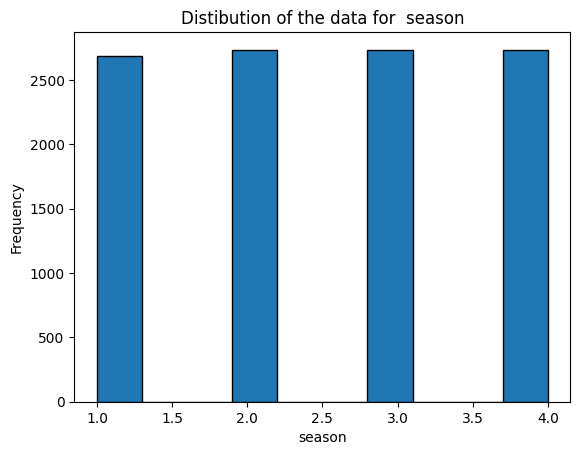

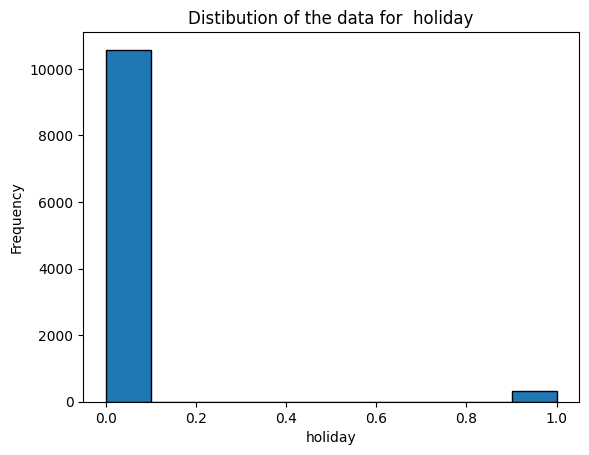

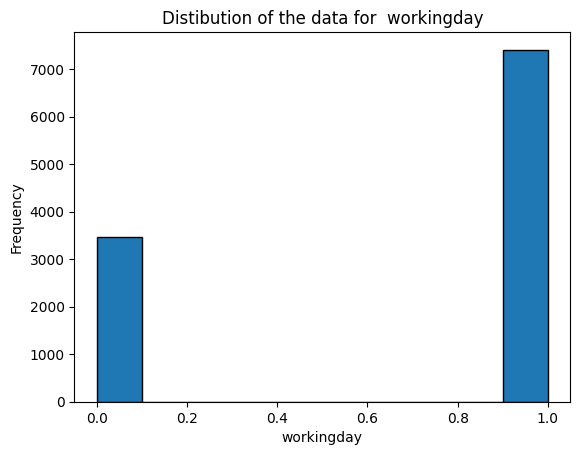

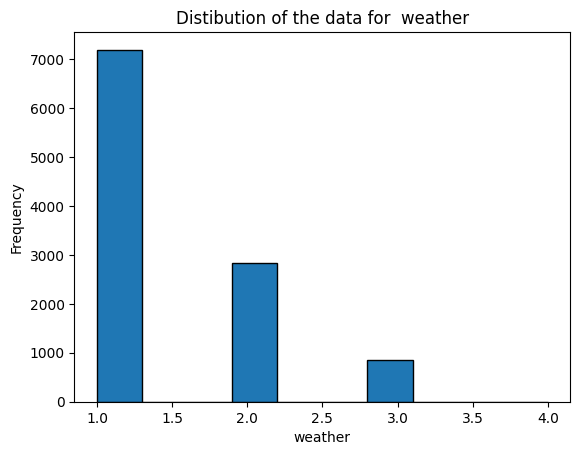

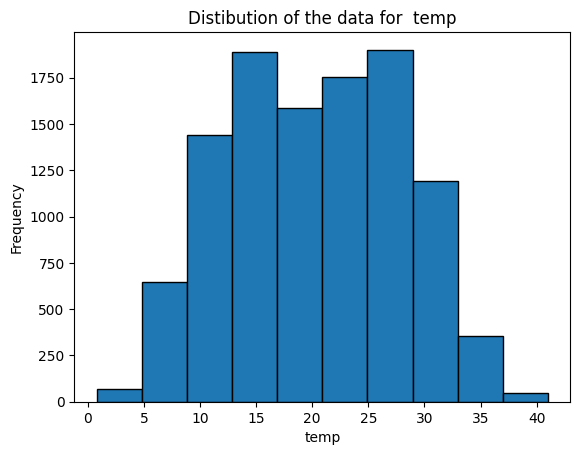

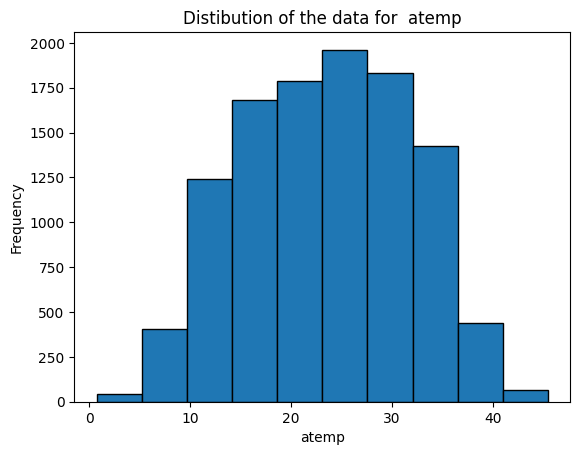

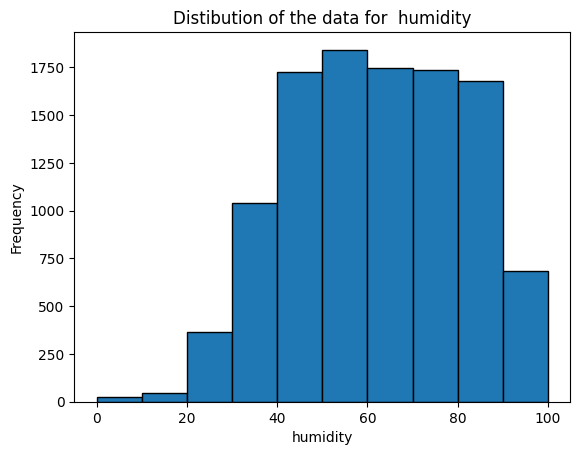

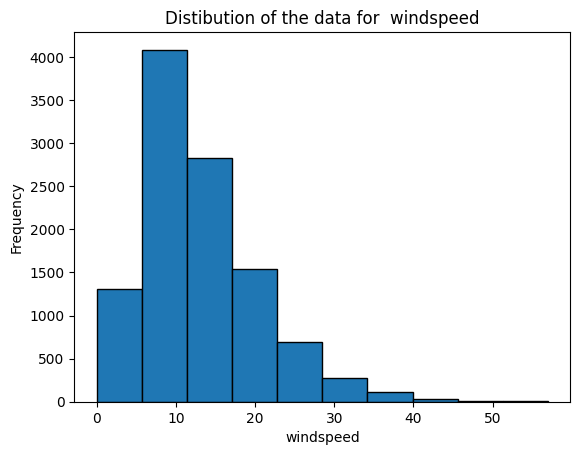

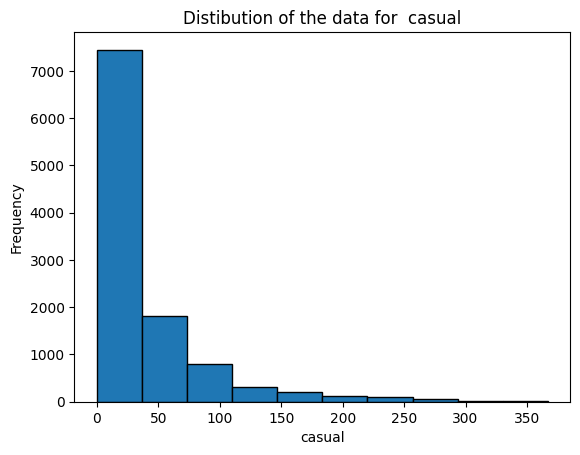

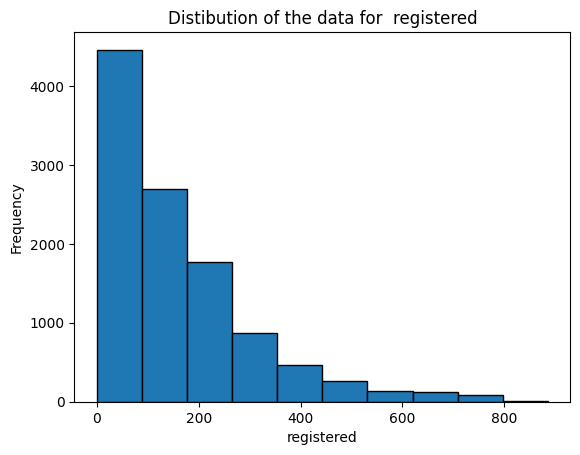

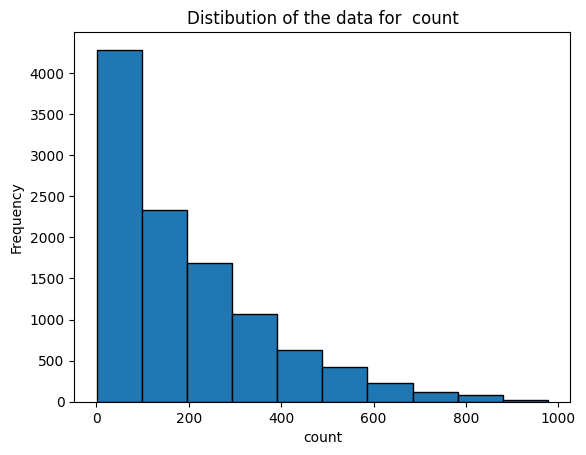

In [ ]:
for i in df:
    plt.hist(df[i], edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Distibution of the data for  {i}')
    plt.show()

# The data is not normally distibuted for :

##season,workingday,weather,temperature,humidity
##the variables dont follouw the guassian distribution

#Right Skewed Data are:
## wind spread,casual,registered,count

##When its a holiday the usage of the Electric cycles are less and its  usage more on weekends which are not holidays



In [ ]:
df["holiday"].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

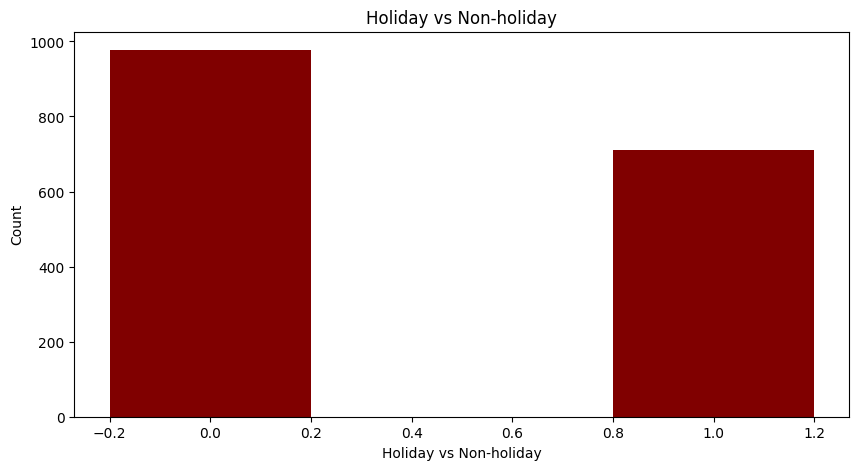

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



fig = plt.figure(figsize=(10, 5))

# Creating the bar plot
plt.bar(x=df["holiday"], height=df["count"], color='maroon', width=0.4)

plt.xlabel("Holiday vs Non-holiday")
plt.ylabel("Count")
plt.title("Holiday vs Non-holiday")
plt.show()


# Therfore Electric cycles are more used on holidays than non-holiday

In [ ]:
df["season"].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

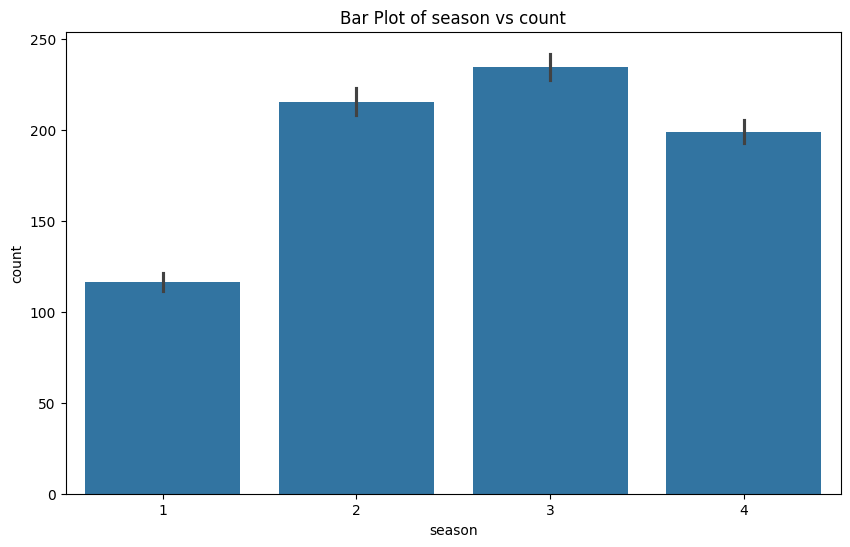

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="season", y="count")
plt.title("Bar Plot of season vs count")
plt.xlabel("season")
plt.ylabel("count")
plt.show()

# In Spring season elecric cycles are used less

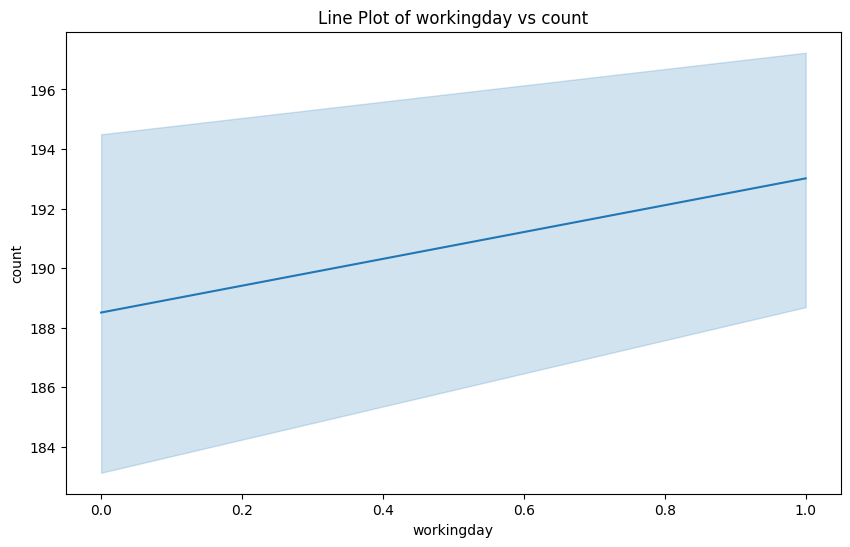

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="workingday", y="count")
plt.title("Line Plot of workingday vs count")
plt.xlabel("workingday")
plt.ylabel("count")
plt.show()

# Therfore on weekends the elecric vehicle usage will be more

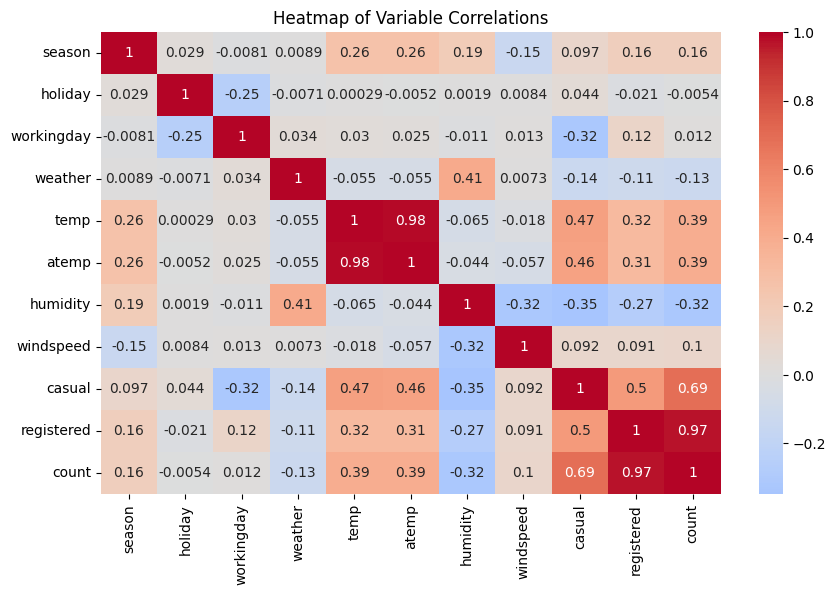

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap of Variable Correlations")
plt.show()

# Temperature and Atemperature and registred all(registred and casual users) are highly corellated

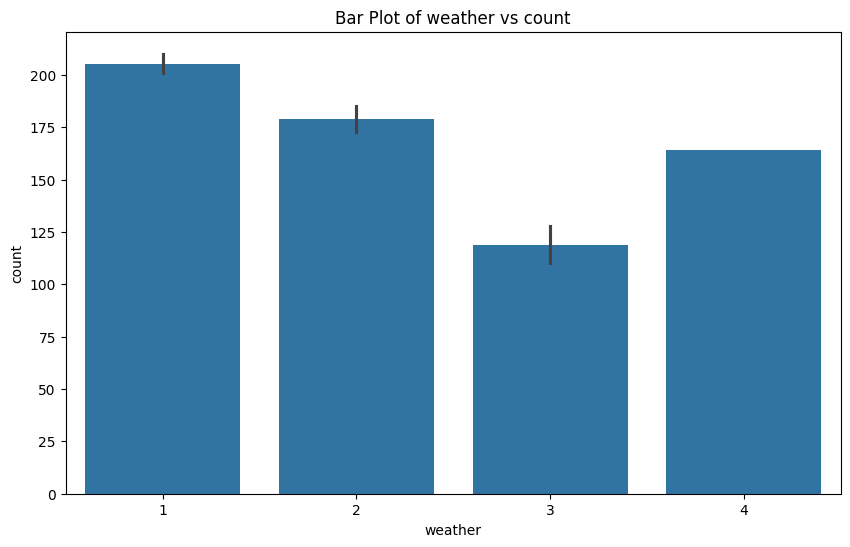

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="weather", y="count")
plt.title("Bar Plot of weather vs count")
plt.xlabel("weather")
plt.ylabel("count")
plt.show()


# More usage of elecrtic cycles are in
# 1: Clear, Few clouds, partly cloudy, partly cloudy


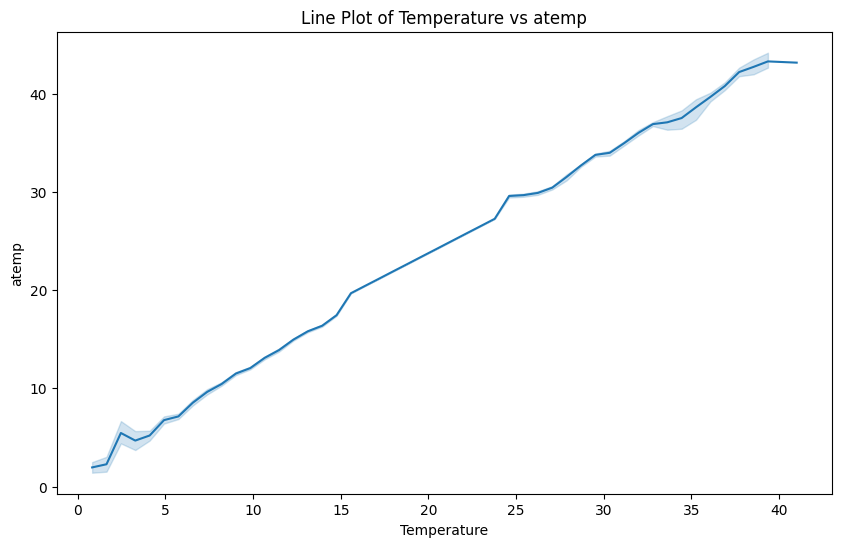

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="temp", y="atemp")
plt.title("Line Plot of Temperature vs atemp")
plt.xlabel("Temperature")
plt.ylabel("atemp")
plt.show()

# Here temperature and Atemp are correlated as and when temperature raises atemp also raises

In [ ]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

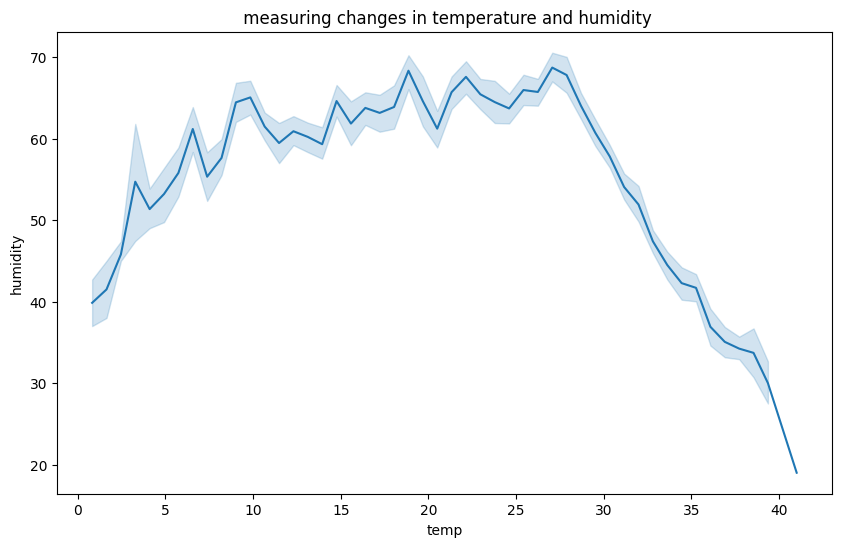

In [ ]:


plt.figure(figsize=(10, 6))
sns.lineplot(data=df,x="temp",y="humidity" )
plt.title(" measuring changes in temperature and humidity")
plt.xlabel("temp")
plt.ylabel("humidity")
plt.show()

# At lesser temperature humidity is increasing and at higher temperature humidity is decreasing

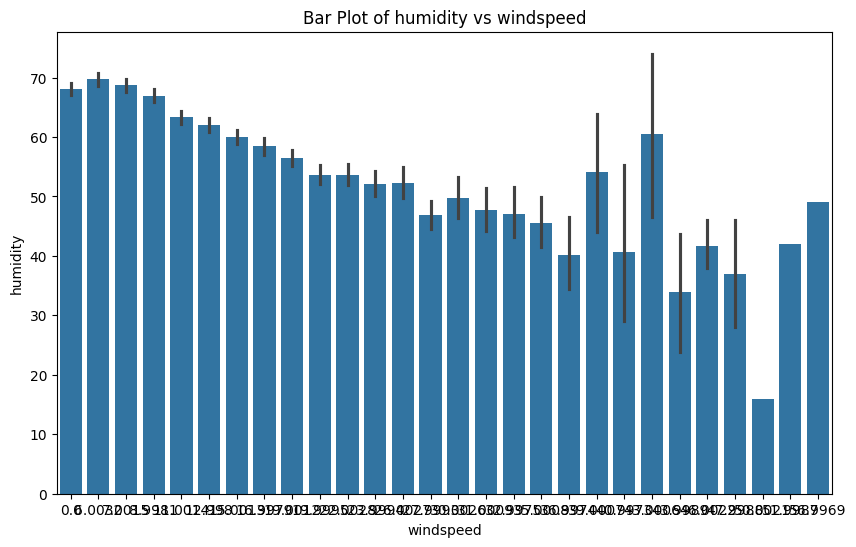

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="windspeed", y="humidity")
plt.title("Bar Plot of humidity vs windspeed")
plt.xlabel("windspeed")
plt.ylabel("humidity")
plt.show()

# The high speed of wind decreases the level of humidity and low wind speed causes a high level of humidity. They also affect our human body. As the wind increases heat is carried away from the body which lows down both skin temperature and internal body temperature.

# This may traceback the usge of electriic cycles.

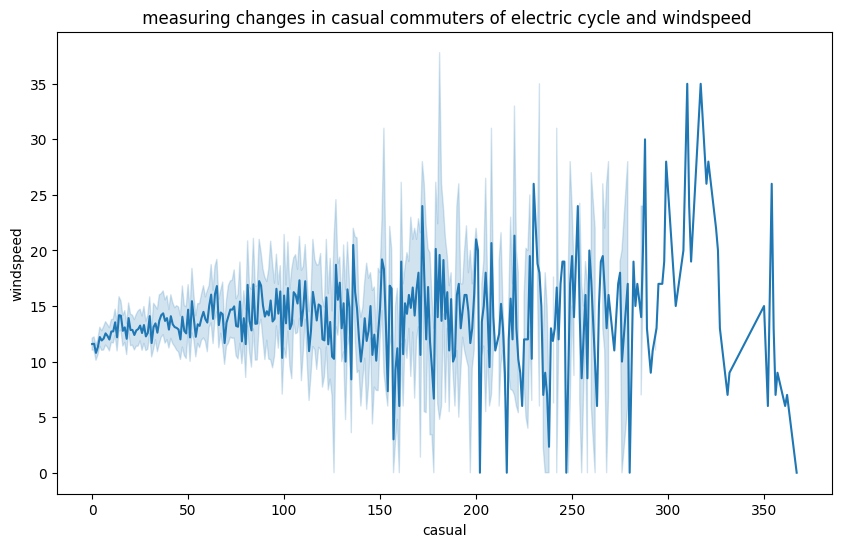

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df,y="windspeed",x="casual" )
plt.title(" measuring changes in casual commuters of electric cycle and windspeed")
plt.ylabel("windspeed")
plt.xlabel("casual")
plt.show()

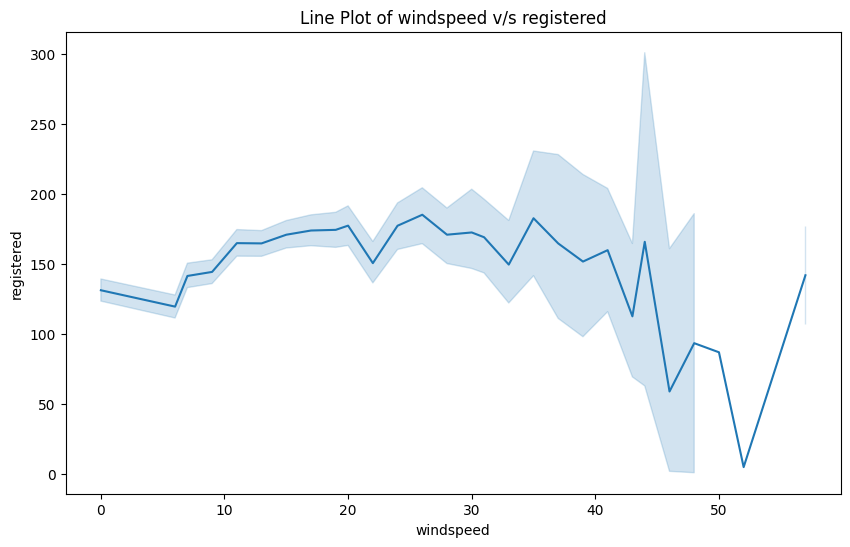

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="windspeed", y="registered")
plt.title("Line Plot of windspeed v/s registered")
plt.xlabel("windspeed")
plt.ylabel("registered")
plt.show()

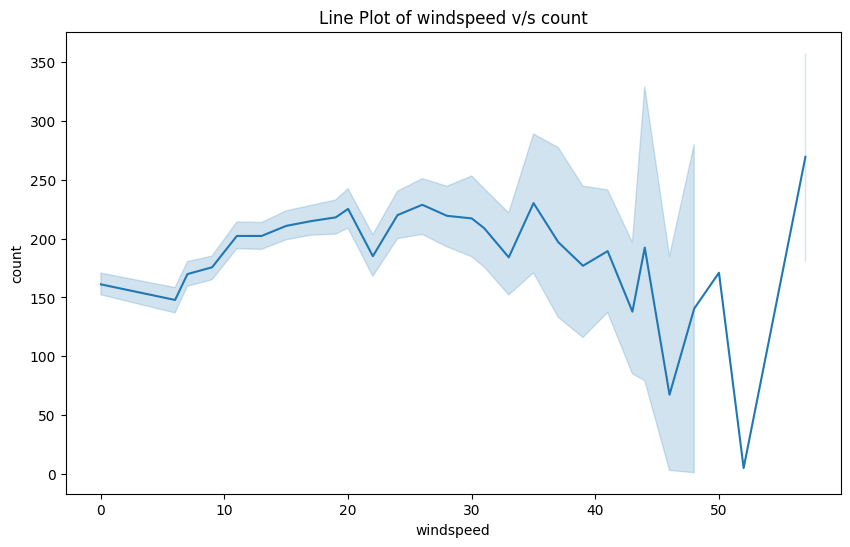

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="windspeed", y="count")
plt.title("Line Plot of windspeed v/s count")
plt.xlabel("windspeed")
plt.ylabel("count")
plt.show()

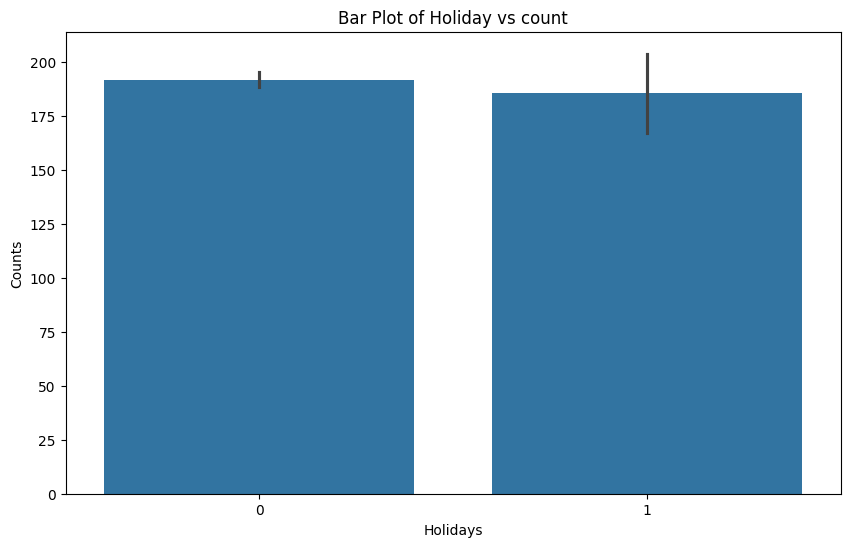

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="holiday", y="count")
plt.title("Bar Plot of Holiday vs count")
plt.xlabel("Holidays")
plt.ylabel("Counts")
plt.show()

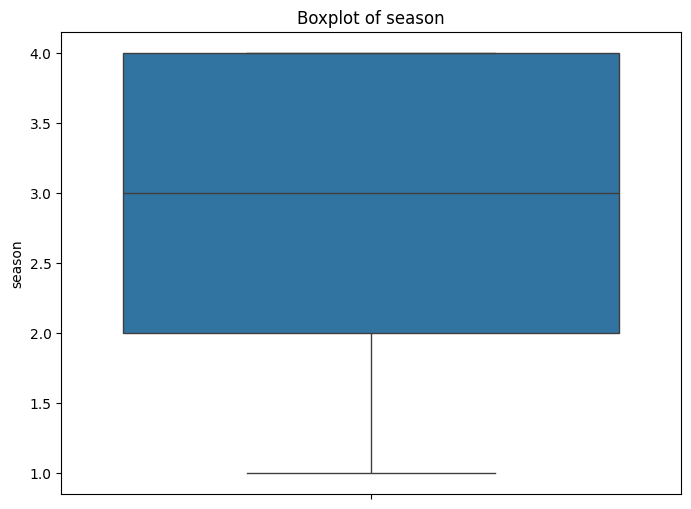

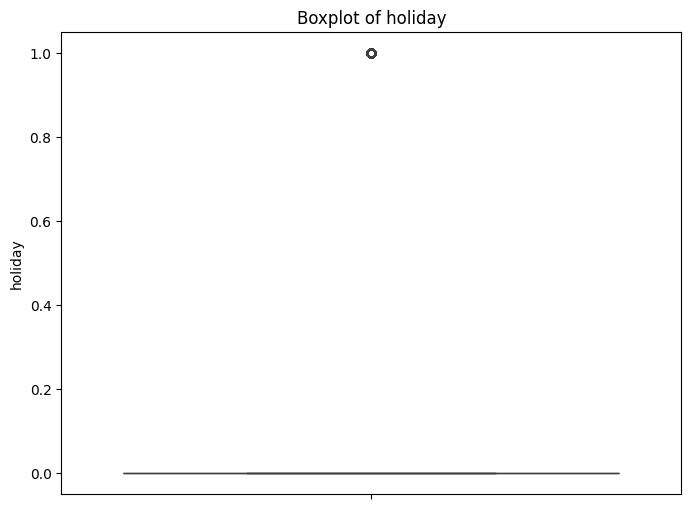

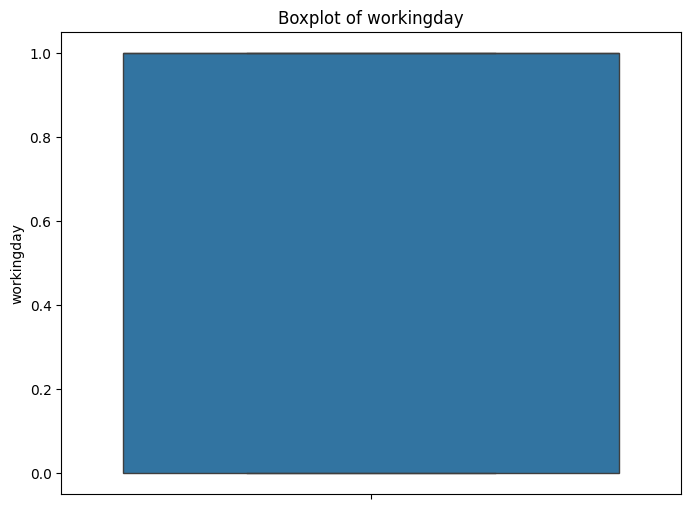

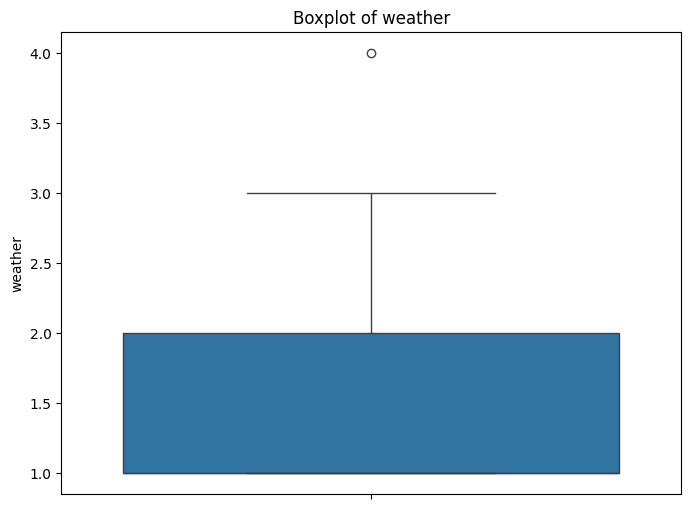

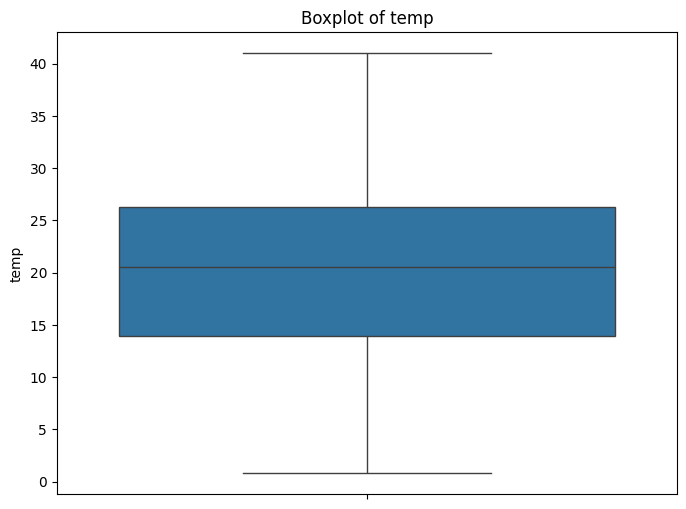

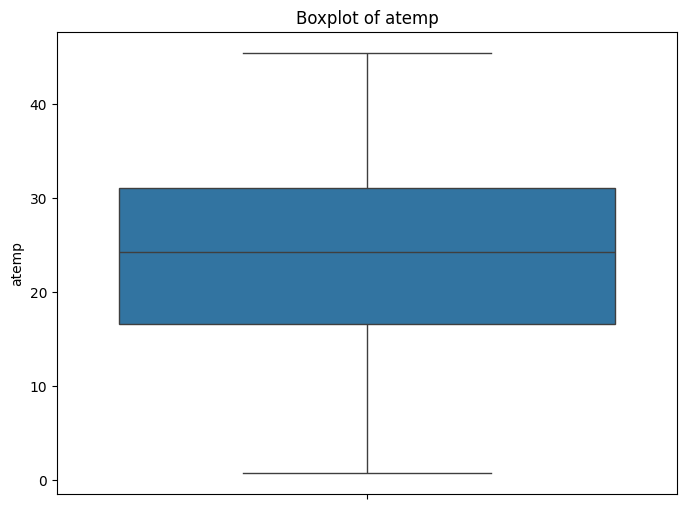

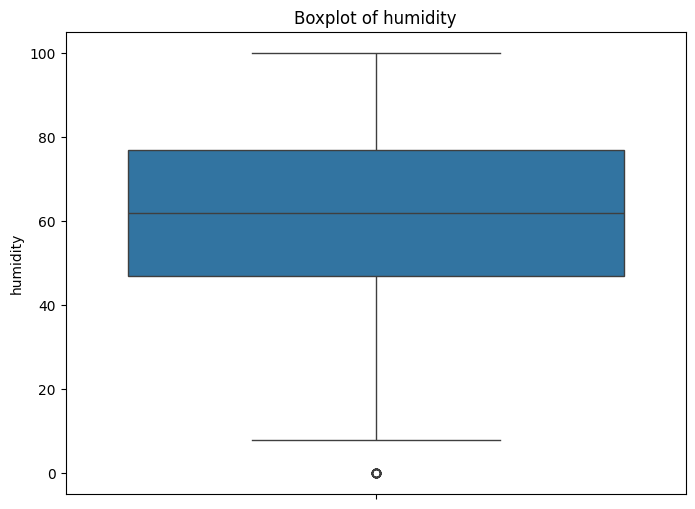

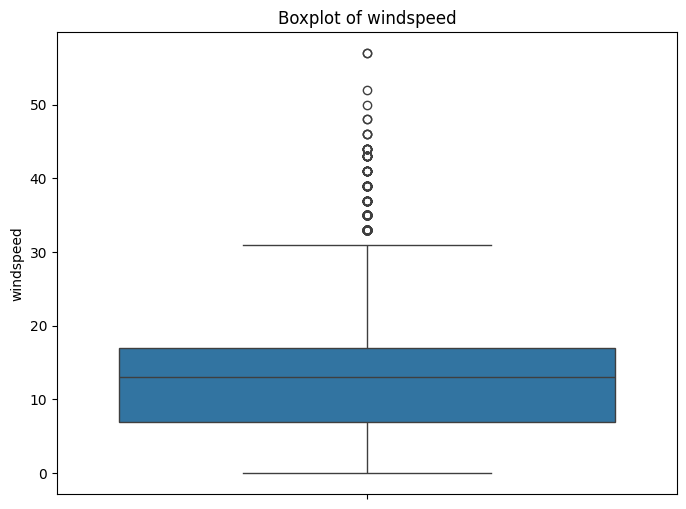

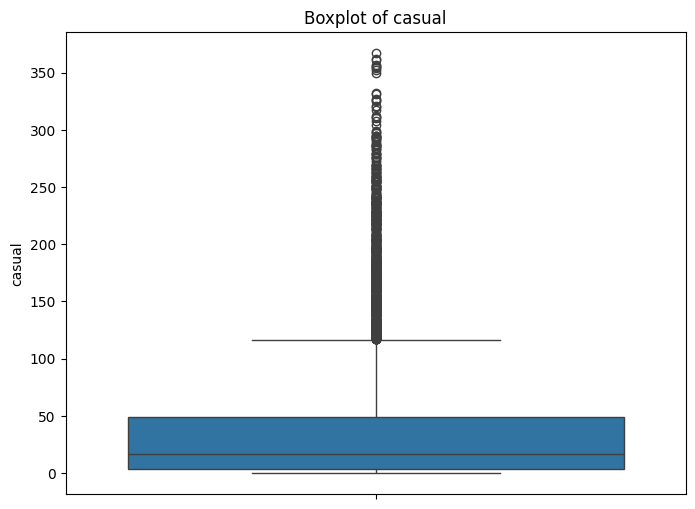

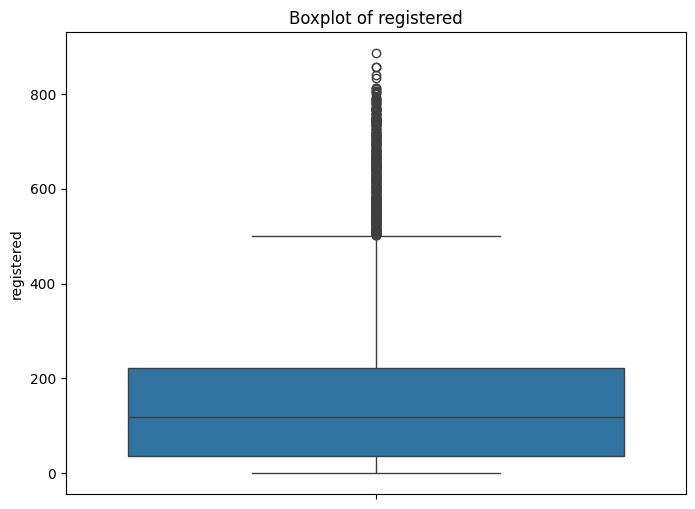

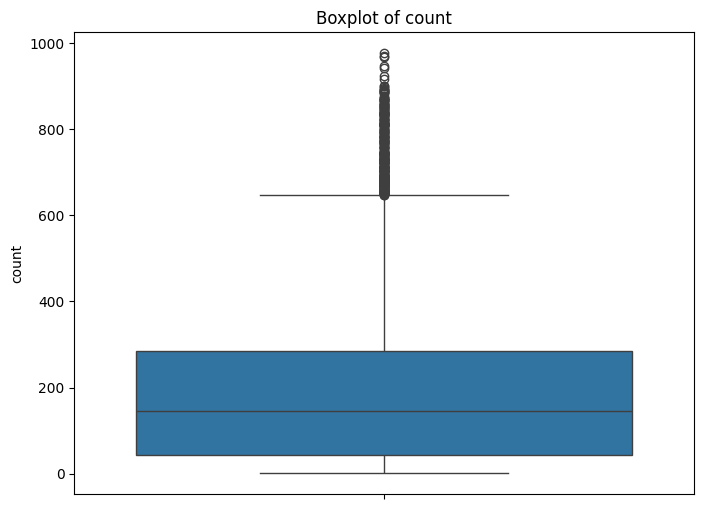

In [ ]:
for i in df:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot of {i}')
    plt.ylabel(i)
    plt.show()

#TESTING ON THE DATA

## 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [ ]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
#2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented
Z_stat,p_value = stats.ttest_ind(df[df["workingday"]==1]["count"],df[df["workingday"]==0]["count"])

print("Z-statistic:", Z_stat)
print("P-value:", p_value)

Z-statistic: 1.2096277376026694
P-value: 0.22644804226361348


In [ ]:
# Here in the data give  "0 "  represents WEEKENDS and "1" represents NEITHER WORKING DAY NOR HOLIDAY

Ho = "Working Day has no effect on the number of electric cycles rented"
Ha = "Working Day has an effect on the number of electric cycles rented"

alpha = 0.05

if p_value < alpha:
    print(f"{Ha} as the p_value {p_value} < {alpha}")
else:
    print(f"{Ho} as the p_value {p_value} > {alpha}")

Working Day has no effect on the number of electric cycles rented as the p_value 0.22644804226361348 > 0.05


#Analysis and Conclusion: Effect of Working Day on the Number of Electric Cycles Rented
###Hypotheses
Null Hypothesis (H0): Working Day has no effect on the number of electric cycles rented.
Alternative Hypothesis (Ha): Working Day has an effect on the number of electric cycles rented.
###Test Result
####P-value: 0.22644804226361348
Given that the p-value (0.22644804226361348) is greater than the significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant evidence to suggest that the working day has an effect on the number of electric cycles rented.

Conclusion
Based on the statistical analysis, we conclude that working days do not have a significant impact on the number of electric cycles rented. The data does not provide sufficient evidence to suggest a difference in the rental patterns between working days and non-working days.

###Recommendations
####Focus on Other Factors:

Since working days do not significantly impact rental numbers, focus on other factors that might influence electric cycle rentals, such as weather conditions, seasons, or special events.
###Further Analysis:

Conduct additional analyses to identify other variables that may affect rental patterns. Consider factors such as time of day, location, and pricing strategies.
###Customer Feedback:

Collect and analyze customer feedback to understand their preferences and needs. This can help identify areas for improvement and potential factors influencing rental decisions.
###Marketing Strategies:

Develop marketing strategies that target a broader audience without specifically focusing on working days. Promote the benefits of using electric cycles for various purposes, such as leisure, errands, and commuting, regardless of the day of the week.
###Operational Efficiency:

Ensure that electric cycles are well-maintained and readily available throughout the week. Since working days do not have a significant impact, maintaining consistent service quality and availability can help attract and retain customers.
###Explore Promotional Campaigns:

Test different promotional campaigns to see if they can drive rental numbers. For example, offer discounts or special deals during off-peak times or on specific days to encourage more rentals.
Action Plan
###Data Collection:

Continue collecting data on electric cycle rentals, including additional variables that could impact usage patterns.
###Customer Surveys:

Implement surveys to gather insights from customers about their rental experience and preferences.
###Pilot Programs:

Launch pilot programs to test new marketing strategies or promotions and evaluate their effectiveness in driving rentals.
###Regular Reviews:

Regularly review rental data and customer feedback to make informed decisions and adjust strategies as needed.
By focusing on these recommendations and continuously analyzing data, the electric cycle rental service can better understand and meet customer needs, ultimately driving higher usage and customer satisfaction.








In [ ]:
from scipy.stats import kruskal

group1 = df[df["workingday"] == 0]["count"]
group2 = df[df["workingday"] == 1]["count"]

stat, p_value = kruskal(group1, group2)
print("Kruskal-Wallis H test statistic:", stat)
print("P-value:", p_value)
Ho = "Working Day has no effect on the number of electric cycles rented"
Ha = "Working Day has an effect on the number of electric cycles rented"

alpha = 0.05

if p_value < alpha:
    print(f"{Ha} as the p_value {p_value} < {alpha}")
else:
    print(f"{Ho} as the p_value {p_value} > {alpha}")

Kruskal-Wallis H test statistic: 0.0016182887191034687
P-value: 0.9679113872727798
Working Day has no effect on the number of electric cycles rented as the p_value 0.9679113872727798 > 0.05


# Therfore commuters are renting the cycles on non working days or Weekends more
# we analyse the the things using the @ sampled t-test and Kruskal-Wallis

#ANNOVA to check if No. of cycles rented is similar or different in different

#1. weather
#2. season

In [ ]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

#weather:
##1: Clear, Few clouds, partly cloudy, partly cloudy
##2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
##3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
##4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [ ]:
group1 = df[df["weather"] == 1]["count"]
group2 = df[df["weather"] == 2]["count"]
group3 = df[df["weather"] == 3]["count"]
group4 = df[df["weather"] == 4]["count"]


# Performing one-way ANOVA

from scipy.stats import f_oneway
statistic, p_value = f_oneway(group1, group2, group3, group4)

print("ANOVA F-statistic:", statistic)
print("P-value:", p_value)



Ho = "Working Day has no effect on the number of electric cycles rented"
Ha = "Working Day has an effect on the number of electric cycles rented"

alpha = 0.05

if p_value < alpha:
    print(f"{Ha} as the p_value {p_value} < {alpha}")
else:
    print(f"{Ho} as the p_value {p_value} > {alpha}")

ANOVA F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42
Working Day has an effect on the number of electric cycles rented as the p_value 5.482069475935669e-42 < 0.05


In [ ]:
df["season"].value_counts()


season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [ ]:
dgroup1 = df[df["season"] == 1]["count"]
group2 = df[df["season"] == 2]["count"]
group3 = df[df["season"] == 3]["count"]
group4 = df[df["season"] == 4]["count"]


# Performing one-way ANOVA
statistic, p_value = f_oneway(group1, group2, group3, group4)

print("ANOVA F-statistic:", statistic)
print("P-value:", p_value)



Ho = "season has no effect on the number of electric cycles rented"
Ha = " season has an effect on the number of electric cycles rented"

alpha = 0.05

if p_value < alpha:
    print(f"{Ha} as the p_value {p_value} < {alpha}")
else:
    print(f"{Ho} as the p_value {p_value} > {alpha}")

ANOVA F-statistic: 20.447601002762333
P-value: 3.2207132104509744e-13
 season has an effect on the number of electric cycles rented as the p_value 3.2207132104509744e-13 < 0.05


#ANOVA Results Summary
##Working Day
F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42
Since the p-value is significantly smaller than 0.05, we reject the null hypothesis and conclude that working days have a statistically significant effect on the number of electric cycles rented.

##Season
F-statistic: 20.447601002762333
P-value: 3.2207132104509744e-13
Similarly, the p-value is much smaller than 0.05, so we reject the null hypothesis and conclude that seasons have a statistically significant effect on the number of electric cycles rented.

#Hypothesis Testing Reports
Effect of Working Day on Electric Cycle Rentals
Null Hypothesis (H0): The number of electric cycles rented does not differ significantly between working days and non-working days.
Alternative Hypothesis (H1): The number of electric cycles rented differs significantly between working days and non-working days.
ANOVA Results:

F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42
Conclusion:

The p-value is significantly less than 0.05.
We reject the null hypothesis.
Working days have a significant effect on the number of electric cycles rented.
Effect of Season on Electric Cycle Rentals
Null Hypothesis (H0): The number of electric cycles rented does not differ significantly across different seasons.
Alternative Hypothesis (H1): The number of electric cycles rented differs significantly across different seasons.
ANOVA Results:

F-statistic: 20.447601002762333
P-value: 3.2207132104509744e-13
Conclusion:

The p-value is significantly less than 0.05.
We reject the null hypothesis.
The season has a significant effect on the number of electric cycles rented.
Recommendations
Based on the results, here are some actionable recommendations:

#Working Days Focus:

Increase Availability: Ensure a higher availability of electric cycles during working days as demand is significantly higher.
Targeted Marketing: Develop marketing campaigns targeting working professionals, possibly highlighting the convenience and efficiency of using electric cycles for commuting.
#Seasonal Adjustments:

###Seasonal Promotions:
Introduce seasonal promotions or discounts to encourage rentals during seasons with lower demand.
##Maintenance and Inventory Management:
 Schedule maintenance and adjust inventory based on seasonal demand patterns to optimize operational efficiency.
##Season-specific Campaigns:
Tailor marketing strategies to align with seasonal trends. For example, promoting electric cycles as a green alternative during spring or summer.
#Data-Driven Strategies:

##Continuous Monitoring:
Regularly analyze rental data to identify emerging trends and adapt strategies accordingly.
##User Feedback:
Collect and analyze user feedback to understand the preferences and pain points related to working days and seasons, and use this information to improve services.
#Infrastructure Development:

##Expand Bike Lanes:
 Work with local authorities to expand bike lanes and parking facilities, especially in areas with high demand during working days.
##Weather Protection:
 Consider investing in infrastructure that provides weather protection for cyclists, such as covered bike racks or rain shelters.

Implementing these recommendations can help optimize the operations of the electric cycle rental service and better cater to the needs of users, thereby increasing overall satisfaction and usage rates.








#Chi-square test to check if Weather is dependent on the season

In [ ]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Conclusion
if p < 0.05:
    print("Reject the null hypothesis: Weather is dependent on the season.")
else:
    print("Fail to reject the null hypothesis: Weather is independent of the season.")

Chi-square statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Degrees of freedom: 9
Expected frequencies:
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
Reject the null hypothesis: Weather is dependent on the season.


#Chi-square Test Report: Weather Dependence on Season

The objective of this analysis is to determine whether weather conditions are dependent on the season. We use the Chi-square test for independence to evaluate the relationship between two categorical variables: weather and season.

##Data and Methodology
###Variables:
####Weather Conditions: Various categories of weather
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

###Seasons: season (1: spring, 2: summer, 3: fall, 4: winter)
####Test Applied: Chi-square test for independence.
####Significance Level: 0.05
####Contingency Table
The observed frequencies of different weather conditions across seasons were organized into a contingency table.

####Results of the Chi-square Test
####Chi-square Statistic: 49.158655596893624
####P-value: 1.549925073686492e-07
####Degrees of Freedom: 9
##Expected Frequencies:


[[1774.54639  699.25813  211.948742   0.246739]
 [1805.59765  711.493845 215.65745    0.251056]
 [1805.59765  711.493845 215.65745    0.251056]
 [1806.25831  711.75418  215.736359   0.251148]]


####Interpretation of Results
The Chi-square statistic of 49.158655596893624 is considerably high.
The P-value of 1.549925073686492e-07 is much smaller than the significance level of 0.05.
Given that the p-value is significantly less than 0.05, we reject the null hypothesis. This indicates a statistically significant dependence between weather conditions and the season.

####Conclusion
Based on the Chi-square test results, we conclude that weather conditions are dependent on the season. This implies that different weather conditions are not uniformly distributed across seasons.

#Recommendations
####Seasonal Planning:

####Resource Allocation:
Allocate resources based on expected weather conditions for each season. For example, ensure that adequate measures are in place for rainy seasons.
####Event Scheduling:
Plan events and activities considering the prevalent weather conditions of each season to maximize attendance and enjoyment.
####Public Information Campaigns:

####Weather Preparedness:
 Conduct public information campaigns to prepare communities for typical weather conditions in upcoming seasons. This could include advisories for seasonal hazards like heavy rainfall or extreme heat.
####Health Recommendations:
Provide health recommendations that align with seasonal weather patterns, such as hydration tips for hot summers or safety measures for icy winters.
####Infrastructure Development:

####Season-specific Infrastructure:
Develop infrastructure projects tailored to seasonal weather. For example, improve drainage systems for seasons with heavy rainfall and enhance cooling systems for hot seasons.
####Business Strategies:

####Inventory Management:
Retailers can adjust inventory levels according to seasonal weather trends. Stocking up on items like umbrellas and raincoats before the rainy season or sunscreen and fans before the summer can meet customer demand more effectively.
####Promotional Campaigns:
Design promotional campaigns that cater to seasonal weather preferences, such as discounts on warm clothing in fall and winter or outdoor gear in spring and summer.
By recognizing the dependence of weather on the season, organizations, and individuals can better prepare and adapt to seasonal changes, improving safety, satisfaction, and operational efficiency.








#Recommendations to Yulu:

### In addressing the demand for the Electric cycles:

####1. Data Analysis and Monitoring
Demand Analysis: Continuously analyze rental data to identify patterns and trends. Look for peak demand times, popular routes, and usage variations between working days and weekends.
Customer Feedback: Collect feedback through surveys and reviews to understand customer preferences and pain points.
####2. Optimize Inventory Management
Dynamic Fleet Allocation: Adjust the number of electric cycles available based on demand patterns. Ensure high availability during peak hours and in high-demand areas.
Maintenance Schedule: Implement a proactive maintenance schedule to keep cycles in good condition, minimizing downtime.
####3. Expand Availability
Strategic Locations: Increase the number of rental stations in high-demand areas such as business districts, residential areas, and tourist spots.
Accessibility: Ensure stations are easily accessible and visible to potential users.
####4. Seasonal and Weather Adjustments
Seasonal Promotions: Offer seasonal discounts or promotions to boost rentals during off-peak seasons.
Weather Preparedness: Provide rain covers, offer discounts during adverse weather conditions, or suggest alternate routes that are safer in bad weather.
####5. Pricing Strategies
Dynamic Pricing: Implement dynamic pricing models that adjust rental rates based on demand, time of day, and day of the week.
Membership Plans: Offer subscription-based models for frequent users, providing unlimited rides for a fixed monthly fee.
####6. Marketing and Promotion
Targeted Campaigns: Run targeted marketing campaigns to attract different user groups, such as commuters, tourists, and students.
Referral Programs: Implement referral programs where existing users can invite friends and earn rewards.
####7. Enhance User Experience
Mobile App Enhancements: Improve the mobile app to make it user-friendly, with features like real-time availability, route suggestions, and easy payment options.
Customer Support: Provide robust customer support to handle inquiries, resolve issues quickly, and enhance user satisfaction.
####8. Sustainability and Community Engagement
Sustainability Initiatives: Highlight the environmental benefits of using electric cycles in marketing campaigns to attract eco-conscious users.
Community Events: Organize community events and participate in local activities to promote electric cycles and engage with potential users.
####9. Collaborations and Partnerships
Corporate Partnerships: Partner with companies to offer corporate memberships or discounts for employees who use electric cycles for commuting.
Local Government Collaboration: Work with local governments to expand cycling infrastructure, such as dedicated bike lanes and secure parking areas.
####10. Regular Review and Improvement
###Performance Metrics:
Regularly review key performance metrics such as utilization rates, customer satisfaction scores, and financial performance.
Continuous Improvement: Implement a continuous improvement process based on data analysis, customer feedback, and market trends.
###Implementation Plan
###Initial Assessment:
Conduct a thorough assessment of current operations, demand patterns, and customer feedback.
###Pilot Programs:
Implement pilot programs for dynamic pricing, new marketing campaigns, and fleet adjustments.
###Monitor and Adjust:
Monitor the results of pilot programs, gather data, and make necessary adjustments.
###Full-Scale Rollout:
Roll out successful strategies on a larger scale across all service areas.
###Ongoing Review:
 Establish a regular review process to ensure strategies remain effective and adapt to changing demand patterns.

# Demand for shared electric cycles in the Indian market

Predicting the demand for shared electric cycles in the Indian market involves identifying significant variables that influence usage patterns. Based on common factors that typically affect bike-sharing systems and considering the specific context of India, here are the potential significant variables:
##Significant Variables
####Weather Conditions:

####Temperature:
High temperatures can deter usage, while mild weather can increase demand.
####Rainfall:
Rainy weather typically decreases demand.
####Humidity:
High humidity can affect comfort and thus impact usage.
#Day of the Week:

###Weekdays vs. Weekends:
Usage patterns often vary between working days and weekends, with weekends potentially seeing more leisure trips.
##Time of Day:

####Peak Hours:
Morning and evening rush hours may see higher demand for commuting.
####Off-Peak Hours:
Lower demand during midday and late night.
#Seasonality:

####Season: Different seasons (summer, monsoon, winter) can affect cycling conditions and user preferences.
####Demographic Factors:

#Population Density:
Higher density areas may see more demand due to more potential users.
####Age Distribution:
Younger populations might be more inclined to use shared cycles.
####Economic Factors:

#Income Levels:
Affordability and disposable income can influence the ability to use shared cycles.
####Employment Rates:
Areas with higher employment rates might see more commuting-related usage.
####Infrastructure:

####Availability of Bike Lanes:
The presence of dedicated bike lanes can encourage usage.
####Proximity to Public Transport:
Integration with other forms of public transport can boost demand.
#Pricing:

####Cost per Ride:
Pricing strategies, including discounts and dynamic pricing, can impact demand.
Subscription Plans: Availability of subscription plans can influence regular usage.
####Promotional Activities:

####Marketing Campaigns:
Effective promotions and awareness campaigns can increase demand.
####Events and Sponsorships:
Participation in or sponsorship of events can raise awareness and boost short-term demand.
#Socio-Cultural Factors:

####Cultural Acceptance:
 Societal norms and cultural acceptance of cycling as a mode of transport.
####Health Consciousness:
Growing awareness about health and fitness can drive demand.